/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


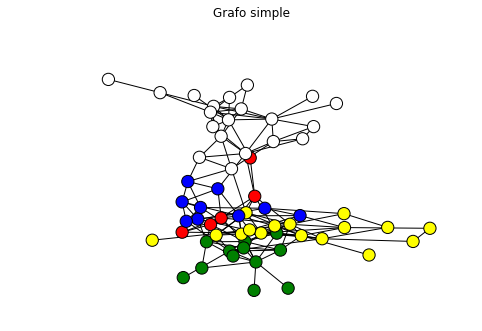

In [1]:
import networkx as nx
import math
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import community



  
def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 


G=nx.read_gml("dolphins.gml")

# Partición en clusters

# Algoritmo de Louvain

# Compute the best partition

part = community.best_partition(G)

# Lista de delfines con grupo

partl=[[x[0],x[1]] for x in part.items()]

# Ordenamos la lista

partl.sort(key=lambda x:x[1])

# Separemos la lista en colores segùn clusters

Col=["r","b","g","w","y","m"]

r=[]
b=[]
g=[]
w=[]
y=[]
m=[]


LCol=[r,b,g,w,y,m]


Com=[x[1] for x in partl]

m=0

for j in range(partl[len(partl)-1][1]+1):
    N=Com.count(j)
    for l in range(m,N+m):
        LCol[j].append(partl[l][0])
    m=N+m

nx.draw(G, 
        width=1, 
        node_color=["blue" if x in b else "red" if x in r else "yellow" if x in y else "white" if x in w else "green" if x in g else "magenta" for x in G.nodes()], 
        node_size=150,
        with_labels=False)
plt.title("Grafo simple")
plt.show()
    

In [2]:
import networkx as nx
import rpy2.robjects as robjects
import numpy as np
import os
import matplotlib.pylab as plt


def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

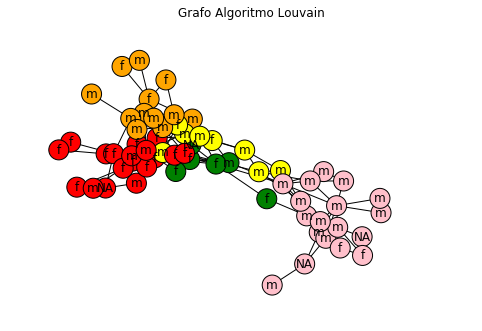

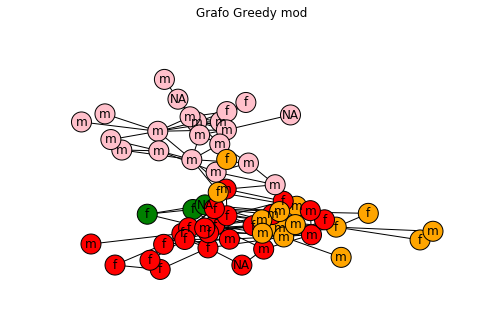

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 20 10:29:59 2018

@author: Fabio
"""

import networkx as nx
import math
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import community



  
def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 


G=nx.read_gml("dolphins.gml")
Gen=ldata("dolphinsGender.txt")

## Partición en clusters
## Algoritmo de Louvain


part = community.best_partition(G)

# Lista de delfines con grupo

partl=[[x[0],x[1]] for x in part.items()]

# Ordenamos la lista

partl.sort(key=lambda x:x[1])

# Separemos la lista en colores segùn clusters

Col=["r","p","g","o","y","m"]

# Col es la lista de los nombres de los colores
# LCol es la lista con las listas de delfines asociados a cada color
# Segun la comunidad a la que pertenecen
r=[]
p=[]
g=[]
o=[]
y=[]
m=[]


LCol=[r,p,g,o,y,m]

# Com es la lista de las comunidades 
#que estaban asiganadas a los delfines y ordenadas

Com=[x[1] for x in partl]

m=0

# Con este comando voy asignando delfines a cada una de las listas
# de colores según su comunidad, usando el hecho de 
# que sé que mi lista partl y Com están ordenadas

for j in range(partl[len(partl)-1][1]+1):
    N=Com.count(j)
    for l in range(m,N+m):
        LCol[j].append(partl[l][0])
    m=N+m


# Con esto asigno géneros a los delfines

for delf in Gen:
    for x in G.nodes.data():
        if x[0]==delf[0]:
            G.nodes[x[0]]["genero"] = delf[1]
            

# Armo un diccionario de delfines con labels

Gend=dict()

for delf in G.nodes.data("genero"):
    Gend[delf[0]]=delf[1]


# Acá simplemente armo el gráfico y ploteo

nx.draw(G, 
        width=1, 
        node_color=["pink" if x in p else "red" if x in r else "yellow" if x in y else "orange" if x in o else "green" if x in g else "magenta" for x in G.nodes()], 
        node_size=400,
        labels=Gend)
plt.title("Grafo Algoritmo Louvain")
plt.show()


#############################
# Ahora hagamos algo parecido pero con Greedy mod

comus = nx.algorithms.community.greedy_modularity_communities(G, weight=None)


# Comus es una lista rara, no me gusta lo de frozenset
# Me armo la lista CD para trabajar mejor

CD=[]

for j in range(len(comus)):
    pin=[]
    for x in comus[j]:
        pin.append(x)
    CD.append(pin)
 
    
# Acá vuelvo a separar los delfines en colores según dominio  
    
for j in range(len(CD)):
    N=len(CD[j])
    for l in range(N):
        LCol[j].append(CD[j][l])
        

nx.draw(G, 
        width=1, 
        node_color=["pink" if x in p else "red" if x in r else "yellow" if x in y else "orange" if x in o else "green" if x in g else "magenta" for x in G.nodes()], 
        node_size=400,
        labels=Gend)
plt.title("Grafo Greedy mod")
plt.show()



In [1]:
import igraph
import networkx as nx
import matplotlib.pyplot as plt
from func import clusterize
import numpy as np
import random



def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 




G = nx.read_gml("dolphins.gml")
Gen=ldata("dolphinsGender.txt")




# Infomap
GI = clusterize(G)
nx.draw_networkx(G,node_color = list(GI.values()),
	               with_labels = False)
# Fast Greedy
GFG = clusterize(G,method="fastgreedy")
nx.draw_networkx(G,node_color = list(GFG.values()),
	               with_labels = False)

# Louvain
GL = clusterize(G,method="louvain")
nx.draw_networkx(G,node_color = list(GL.values()),
	               with_labels = False)

# Edge Betweenness
GE = clusterize(G,method="edge_betweenness")
nx.draw_networkx(G,node_color = list(GE.values()),
	               with_labels = False)

Dic=[GI,GFG,GL,GE]
Lab=["Infomap","Fast-Greedy","Louvain","Edge-Betweennes"]



# Con esto asigno géneros a los delfines

for delf in Gen:
    for x in G.nodes.data():
        if x[0]==delf[0]:
            G.nodes[x[0]]["genero"] = delf[1]


# Armo un diccionario de delfines con generos

Gend=dict()

for delf in G.nodes.data("genero"):
    Gend[delf[0]]=delf[1]

AVISO: restringiendo a la componente connexa mas grade. De otro modo falla el algoritmo de deteccion de comunidades edge_betweenness.


¿Qué método deseas usar? I:Infomap, FG:Fast Greedy, L:Louvain o EB:Edge betwenness :I
¿Queres hacer plot? Si/No :Si
¿Qué genero ploteamos? M, H o NA :H
¿Qué comunidad ploteamos? Las comunidades son numeros enteros de 0 a 6 :2


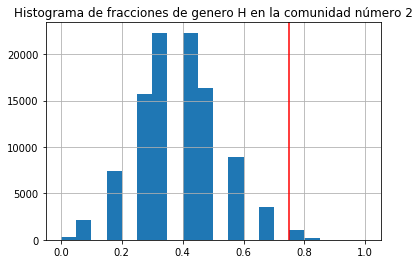

In [3]:
# Punto D

demet={"I":0,"FG":1,"L":2,"EB":3}
elijo=input("¿Qué método deseas usar? I:Infomap, FG:Fast Greedy, L:Louvain o EB:Edge betwenness :") # met es un número que va de 0 a 3, que me indica el método que estoy usando
# para hacer las particiones. 0:Infomap, 1:Fast Greedy, 2:Louvain, 3:Edge Betwenness
met=demet[elijo]


# Los diccionarios de Dic salen de lo de más arriba
# Lo separé porque el guacho me grafica algo que no sé de donde sale
Dic=[GI,GFG,GL,GE]
Lab=["Infomap","Fast-Greedy","Louvain","Edge-Betweennes"]



# Con esto asigno géneros a los delfines

for delf in Gen:
    for x in G.nodes.data():
        if x[0]==delf[0]:
            G.nodes[x[0]]["genero"] = delf[1]


# Armo un diccionario de delfines con generos

Gend=dict()

for delf in G.nodes.data("genero"):
    Gend[delf[0]]=delf[1]



# Para cada cluster, calculo la fracción de géneros

# Fraccion de cada genero en cada cluster.
# Las listas FR## estan ordenadas de cluster 0 a maximo
FRMC=[]
FRHC=[]
FRNAC=[]
for i in range(max(Dic[met].values())+1):
    Frm=0
    Frh=0
    Frna=0
    a= list(Dic[met].values())
    larcom= a.count(i)
    for x in Dic[met].items():
        if x[1]==i:
            if Gend[x[0]]=="m":
                Frm += 1/larcom
            if Gend[x[0]]=="f":
                Frh +=1/larcom
            if Gend[x[0]]=="NA":
                Frna +=1/larcom
    FRMC.append(Frm)
    FRHC.append(Frh)
    FRNAC.append(Frna)


#Calculo las probabilidades de obtener nodos segun genero

# Probabilidad de machos
P_ma=0
for x in Gend.values():
    if x=="m":
        P_ma += 1/len(G.nodes())
        
# Probabilidad de hembras
P_he=0
for x in Gend.values():
    if x=="f":
        P_he += 1/len(G.nodes())

# NA        
P_NA=0
for x in Gend.values():
    if x=="NA":
        P_NA += 1/len(G.nodes())

    
# Armar comunidades aleatorias al azar
# Dical es el diccionario donde el indice es la comunidad
# Y tiene asociadas las 100000 listas a las cuales hacer histograma


Dic_al=dict()
for i in range(max(Dic[met].values())+1):
    a= list(Dic[met].values())
    larcom= a.count(i)
    PH=[]
    for M in range(100000):
        Comalet=[]
        for j in range(larcom):
            g=random.random()
            if g<P_NA:
                delgen="NA"
            if P_NA<g and g<P_NA+P_he:
                delgen="f"
            if P_NA+P_he<g:
                delgen="m"
            Comalet.append(delgen)
        Frm=0
        Frh=0
        Frna=0
        for mm in Comalet:
            if mm=="m":
                Frm += 1/larcom
            if mm=="f":
                Frh +=1/larcom
            if mm=="NA":
                Frna +=1/larcom
        PH.append([Frm,Frh,Frna])
    Dic_al[i]=PH

# Ahora tengo que armar las listas para hacer mis histogramas

Histo_ma=[]
Histo_he=[]
Histo_na=[]
            
for i in range(len(Dic_al)):
    ALFRMC=[]
    ALFRHC=[]
    ALFRNAC=[]
    for m in range(len(Dic_al[i])):
        ALFRMC.append(Dic_al[i][m][0])
        ALFRHC.append(Dic_al[i][m][1])
        ALFRNAC.append(Dic_al[i][m][2])
    Histo_ma.append(ALFRMC)
    Histo_he.append(ALFRHC)
    Histo_na.append(ALFRNAC)
    
# Haber, es mucha información y me cuesta ordenarla.
# Ahora, si yo quisiera, podría plotear histogramas a partir
# De las listas en Histo_ma[i], donde i es la comunidad.
# El tema es que dadas seis comunidades, tengo en total 18 histogramas para plotear
# La verdad que no da. Creo que no vale la pena intentar hacer todo en una sola.
Dichisto={"M":Histo_ma,"H":Histo_he,"NA":Histo_na}

Conplot=input("¿Queres hacer plot? Si/No :")
if Conplot=="Si":
    ggen=input("¿Qué genero ploteamos? M, H o NA :")
    com=int(input("¿Qué comunidad ploteamos? Las comunidades son numeros enteros de 0 a {} :".format(len(Dic_al))))
    plt.hist(Dichisto[ggen][com],bins=20,range=[0,1])
    plt.axvline(FRMC[com],c="red")
    plt.grid()
    plt.title("Histograma de fracciones de genero {} en la comunidad número {}".format(ggen,com))
    plt.show()
else:
    print("Ok, no hay grafico entonces")
    




(array([1.0000e+01, 9.9000e+01, 6.9300e+02, 2.7940e+03, 7.7120e+03,
        1.5036e+04, 2.1479e+04, 2.2300e+04, 1.6697e+04, 9.0570e+03,
        3.2940e+03, 7.5300e+02, 7.6000e+01]),
 array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
        0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
        0.76923077, 0.84615385, 0.92307692, 1.        ]),
 <a list of 13 Patch objects>)

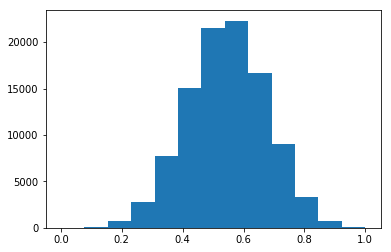

In [67]:
# Punto D, segundo test

